In [98]:
#########################################
#            Image Sharpening           #
#                                       #
# Grenoble INP - Phelma                 #
# SICOM                                 #
#                                       #
# Edna FRICKE                           #
# Henrique LEFUNDES DA SILVA            #
# Lennard FRANZ                         #
#                                       #
# 08/11/2023                            #
#########################################

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as color
import skimage.feature as feature
import skimage.filters as filters
import skimage.morphology as morphology
import skimage.segmentation as segmentation
import skimage.measure as measure
import skimage.util as util
import skimage.draw as draw
import skimage.transform as transform
from scipy.ndimage import convolve

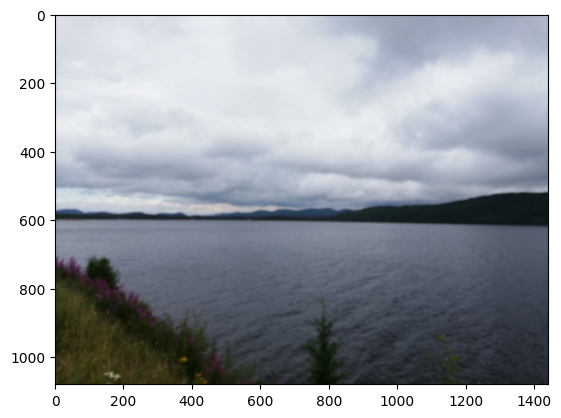

In [100]:
# Load image
img = io.imread('images/saguenay.jpg')
img = util.img_as_float(img)
# Show image
plt.imshow(img)

In [101]:
def create_laplacian(k = 12, C = 1):
    laplacian = (1/C)*np.array([[-1, -2, -1], [-2, k, -2], [-1, -2, -1]])
    return laplacian

def apply_laplacian(img, laplace_filter):
    img_copy = img.copy()
    img_copy = util.img_as_float(img_copy)
    laplace_filter = np.expand_dims(laplace_filter, axis=-1)
    return convolve(img_copy, laplace_filter)

def sharpen_image(img, k = 12, C = 1):
    laplace_filter = create_laplacian(k, C)
    laplace_img = apply_laplacian(img, laplace_filter)
    return laplace_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


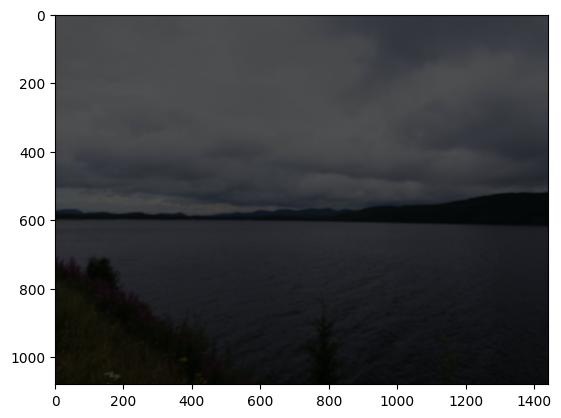

In [102]:
# Copies the image
img_copy = img.copy()

# Sharpen the image
sharpened_img = sharpen_image(img_copy, 16, 12)

# Show the sharpened image
plt.imshow(sharpened_img)